# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
!pip install pandas
!pip install matplotlib

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [3]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']


In [4]:
n = 500

In [5]:
data = {
    'Date': pd.date_range('2021-01-01', periods=n),  # Generate 'n' dates starting from '2021-01-01'
    'Category': [random.choice(categories) for _ in range(n)],  # Random categories from the list
    'Likes': np.random.randint(0, 10000, size=n)  # Random integers between 0 and 10000
}

In [6]:
df = pd.DataFrame(data)

In [7]:
df.head()

,Date,Category,Likes
0,2021-01-01,Health,8266
1,2021-01-02,Culture,1891
2,2021-01-03,Culture,391
3,2021-01-04,Travel,9598
4,2021-01-05,Family,5133


In [8]:
df.tail()

,Date,Category,Likes
495,2022-05-11,Food,699
496,2022-05-12,Travel,1353
497,2022-05-13,Fashion,772
498,2022-05-14,Food,567
499,2022-05-15,Family,2440


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB


In [10]:
df.describe()

,Likes
count,500.000000
mean,4957.760000
std,2847.276437
min,17.000000
25%,2438.500000
50%,5034.500000
75%,7157.750000
max,9980.000000


In [11]:
print("\nCount of each 'Category':")
print(df['Category'].value_counts())


Count of each 'Category':
Food       81
Health     75
Fitness    66
Family     60
Fashion    59
Travel     55
Culture    54
Music      50
Name: Category, dtype: int64


In [12]:
df_cleaned = df.dropna()

In [13]:
df_cleaned = df_cleaned.drop_duplicates()

In [14]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])


In [15]:
df_cleaned['Likes'] = df_cleaned['Likes'].astype(int)


In [16]:
print("Cleaned DataFrame:")
print(df_cleaned.head())

Cleaned DataFrame:
        Date Category  Likes
0 2021-01-01   Health   8266
1 2021-01-02  Culture   1891
2 2021-01-03  Culture    391
3 2021-01-04   Travel   9598
4 2021-01-05   Family   5133


In [17]:
print("\nCleaned DataFrame Info:")
df_cleaned.info()


Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 15.6+ KB


In [18]:
pip install seaborn --upgrade

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


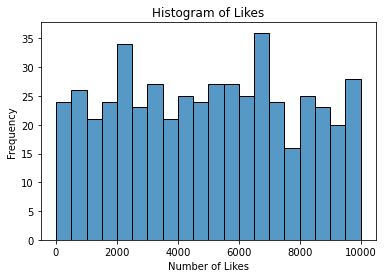

In [21]:
sns.histplot(df_cleaned['Likes'], bins=20, kde=False)
plt.title("Histogram of Likes")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")
plt.show()

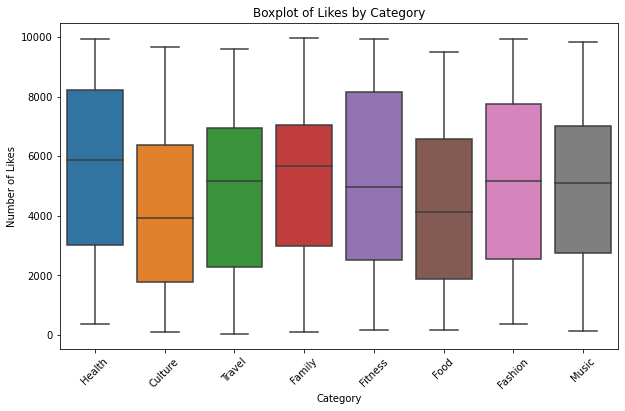

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Likes', data=df_cleaned)
plt.title("Boxplot of Likes by Category")
plt.xlabel("Category")
plt.ylabel("Number of Likes")
plt.xticks(rotation=45)
plt.show()

In [29]:
mean_likes = df_cleaned['Likes'].mean()
print(f"Mean of Likes: {mean_likes}")

Mean of Likes: 4957.76


In [30]:
mean_likes_per_category = df_cleaned.groupby('Category')['Likes'].mean()
print("\nMean Likes per Category:")
print(mean_likes_per_category)


Mean Likes per Category:
Category
Culture    4178.222222
Family     5381.866667
Fashion    5158.644068
Fitness    5147.030303
Food       4313.135802
Health     5533.293333
Music      5088.340000
Travel     4863.672727
Name: Likes, dtype: float64
